# ML Cup Event #3

In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [3]:
import os
os.getcwd()

'C:\\Users\\batch_ru05wmb\\Python for Data Science\\ML Cup'

In [4]:
df = pd.read_csv("diabetes_train.csv")

Id_col = 'Id'
target_col = 'diabetes'
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  576 non-null    int64  
 1   num_times_pregnant  576 non-null    int64  
 2   plasma_glucose      576 non-null    int64  
 3   DBP                 576 non-null    int64  
 4   triceps_skin        576 non-null    int64  
 5   serum_insulin       576 non-null    int64  
 6   BMI                 576 non-null    float64
 7   pedigree            576 non-null    float64
 8   age                 576 non-null    int64  
 9   diabetes            576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop([Id_col, target_col], axis=1)
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.info()
X.shape
X.head()

X_train.info()
X_train.shape
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_times_pregnant  576 non-null    int64  
 1   plasma_glucose      576 non-null    int64  
 2   DBP                 576 non-null    int64  
 3   triceps_skin        576 non-null    int64  
 4   serum_insulin       576 non-null    int64  
 5   BMI                 576 non-null    float64
 6   pedigree            576 non-null    float64
 7   age                 576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


(576, 8)

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,13,129,0,30,0,39.9,0.569,44
1,4,129,86,20,270,35.1,0.231,23
2,3,61,82,28,0,34.4,0.243,46
3,2,81,72,15,76,30.1,0.547,25
4,0,102,75,23,0,0.0,0.572,21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 437 to 102
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_times_pregnant  460 non-null    int64  
 1   plasma_glucose      460 non-null    int64  
 2   DBP                 460 non-null    int64  
 3   triceps_skin        460 non-null    int64  
 4   serum_insulin       460 non-null    int64  
 5   BMI                 460 non-null    float64
 6   pedigree            460 non-null    float64
 7   age                 460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB


(460, 8)

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
437,6,102,82,0,0,30.8,0.180,36
63,7,142,60,33,190,28.8,0.687,61
208,1,119,44,47,63,35.5,0.280,25
60,8,143,66,0,0,34.9,0.129,41
15,0,123,88,37,0,35.2,0.197,29


In [7]:
np.bincount(y)

array([377, 199], dtype=int64)

# Build Model

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# Estimate Model Performance

In [9]:
from sklearn.metrics import confusion_matrix

pred_val = clf.predict(X_val)
pred_val

confusion_matrix(y_val, pred_val)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

array([[78,  3],
       [19, 16]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88        81
           1       0.84      0.46      0.59        35

    accuracy                           0.81       116
   macro avg       0.82      0.71      0.73       116
weighted avg       0.82      0.81      0.79       116



# Create Submission File on Test Data

In [11]:
test_df = pd.read_csv('diabetes_test.csv')

# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = test_df.drop([Id_col], axis=1)

# Use your model to make predictions
pred_test = clf.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'Id': test_df.Id, 'Predicted': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('my_submission.csv', index=False)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]


,Id,Predicted
0,669,0
1,325,0
2,625,0
3,691,0
4,474,0


## Data exploration

In [12]:
df.describe().T
df.columns

,count,mean,std,min,25%,50%,75%,max
Id,576.0,389.411458,221.218135,1.000,194.25,393.5000,576.25000,768.00
num_times_pregnant,576.0,3.741319,3.305452,0.000,1.00,3.0000,6.00000,17.00
plasma_glucose,576.0,120.659722,32.133182,0.000,99.00,117.0000,138.25000,199.00
DBP,576.0,69.505208,18.399810,0.000,64.00,72.0000,80.00000,122.00
triceps_skin,576.0,20.494792,15.424655,0.000,0.00,23.0000,32.00000,63.00
serum_insulin,576.0,80.362847,116.223541,0.000,0.00,37.0000,127.50000,846.00
BMI,576.0,31.981771,7.622203,0.000,27.00,32.0000,36.32500,67.10
pedigree,576.0,0.468618,0.339325,0.078,0.24,0.3725,0.61225,2.42
age,576.0,32.921875,11.507539,21.000,24.00,29.0000,40.00000,81.00
diabetes,576.0,0.345486,0.475940,0.000,0.00,0.0000,1.00000,1.00


Index(['Id', 'num_times_pregnant', 'plasma_glucose', 'DBP', 'triceps_skin',
       'serum_insulin', 'BMI', 'pedigree', 'age', 'diabetes'],
      dtype='object')

In [13]:
df_copy = df.copy(deep = True)
df_copy[['plasma_glucose','DBP','triceps_skin','serum_insulin','BMI']] = df_copy[['plasma_glucose','DBP','triceps_skin','serum_insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Id                      0
num_times_pregnant      0
plasma_glucose          5
DBP                    22
triceps_skin          164
serum_insulin         276
BMI                     6
pedigree                0
age                     0
diabetes                0
dtype: int64


In [14]:
df_copy = df.copy(deep = True)
df_copy[['plasma_glucose','DBP','triceps_skin','serum_insulin','BMI']] = df_copy[['plasma_glucose','DBP','triceps_skin','serum_insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(df_copy.isnull().sum())

Id                      0
num_times_pregnant      0
plasma_glucose          5
DBP                    22
triceps_skin          164
serum_insulin         276
BMI                     6
pedigree                0
age                     0
diabetes                0
dtype: int64


In [15]:
df_copy['plasma_glucose'].fillna(df_copy['plasma_glucose'].mean(), inplace = True)
df_copy['DBP'].fillna(df_copy['DBP'].mean(), inplace = True)
df_copy['triceps_skin'].fillna(df_copy['triceps_skin'].median(), inplace = True)
df_copy['serum_insulin'].fillna(df_copy['serum_insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FE3D62F10>,
      dtype=object)

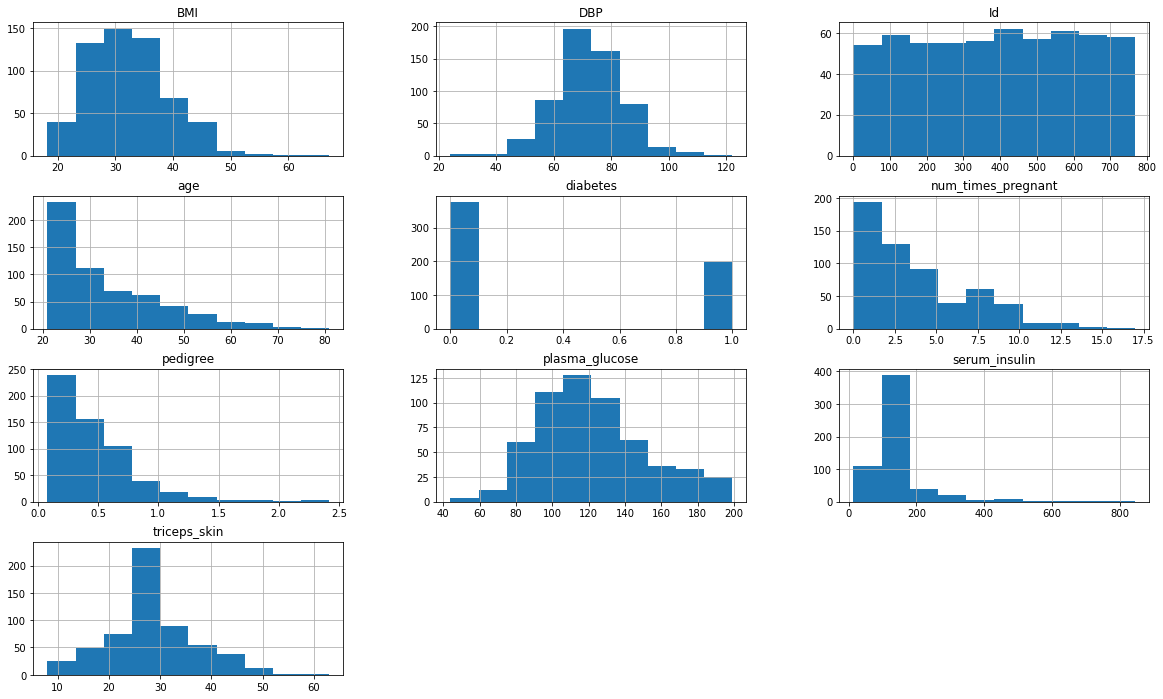

In [16]:
df_copy.hist(figsize=(20,12))

<Figure size 1440x1440 with 0 Axes>

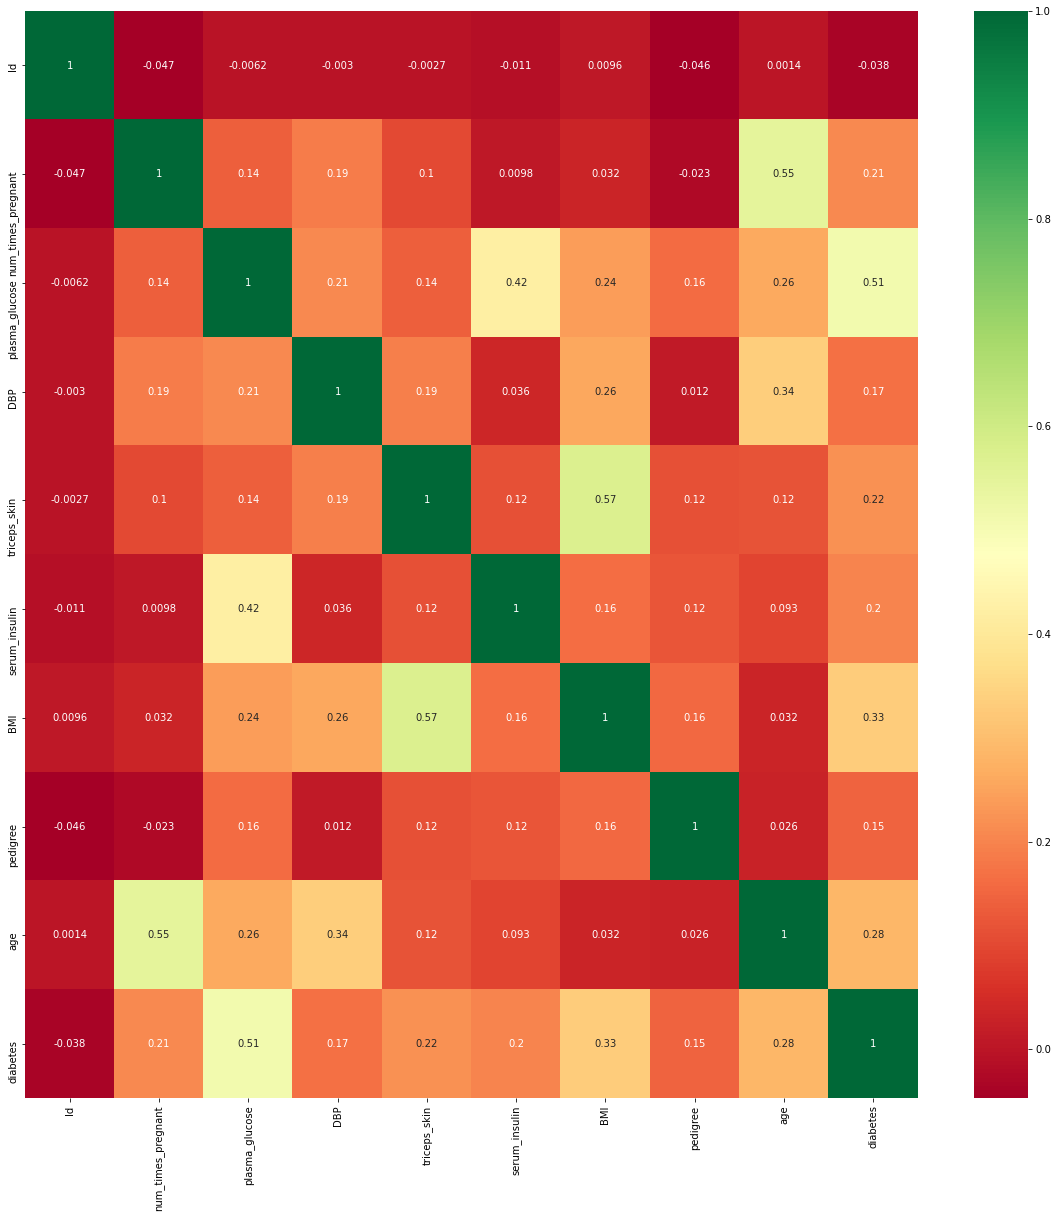

In [17]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_copy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
df_copy = df.copy(deep = True)
df_copy[['plasma_glucose','DBP','triceps_skin','serum_insulin','BMI']] = df_copy[['plasma_glucose','DBP','triceps_skin','serum_insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(df_copy.isnull().sum())

Id                      0
num_times_pregnant      0
plasma_glucose          5
DBP                    22
triceps_skin          164
serum_insulin         276
BMI                     6
pedigree                0
age                     0
diabetes                0
dtype: int64


In [21]:
df_copy['plasma_glucose'].fillna(df_copy['plasma_glucose'].mean(), inplace = True)
df_copy['DBP'].fillna(df_copy['DBP'].mean(), inplace = True)
df_copy['triceps_skin'].fillna(df_copy['triceps_skin'].median(), inplace = True)
df_copy['serum_insulin'].fillna(df_copy['serum_insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [22]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,576.0,389.411458,221.218135,1.000,194.250,393.5000,576.25000,768.00
num_times_pregnant,576.0,3.741319,3.305452,0.000,1.000,3.0000,6.00000,17.00
plasma_glucose,576.0,121.716287,30.080473,44.000,100.000,118.0000,138.25000,199.00
DBP,576.0,72.265343,12.098580,24.000,64.000,72.0000,80.00000,122.00
triceps_skin,576.0,28.751736,8.393735,8.000,24.000,29.0000,32.00000,63.00
serum_insulin,576.0,138.342014,88.505442,14.000,120.000,121.0000,127.50000,846.00
BMI,576.0,32.315104,6.878491,18.200,27.275,32.0000,36.32500,67.10
pedigree,576.0,0.468618,0.339325,0.078,0.240,0.3725,0.61225,2.42
age,576.0,32.921875,11.507539,21.000,24.000,29.0000,40.00000,81.00
diabetes,576.0,0.345486,0.475940,0.000,0.000,0.0000,1.00000,1.00


In [20]:
df_copy.columns

Index(['Id', 'num_times_pregnant', 'plasma_glucose', 'DBP', 'triceps_skin',
       'serum_insulin', 'BMI', 'pedigree', 'age', 'diabetes'],
      dtype='object')

In [87]:
#Get the Independent and Dependent Features
X=df_copy.iloc[:,1:9]
y=df_copy.iloc[:,9]

### split data

In [89]:
X.head()

y.head()

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,13,129.0,72.265343,30.0,121.0,39.9,0.569,44
1,4,129.0,86.000000,20.0,270.0,35.1,0.231,23
2,3,61.0,82.000000,28.0,121.0,34.4,0.243,46
3,2,81.0,72.000000,15.0,76.0,30.1,0.547,25
4,0,102.0,75.000000,23.0,121.0,32.0,0.572,21


0    1
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_val

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
234,9,184,85,15,0,30.0,1.213,49
118,1,111,86,19,0,30.1,0.143,23
346,2,197,70,45,543,30.5,0.158,53
498,2,146,0,0,0,27.5,0.240,28
402,2,83,66,23,50,32.2,0.497,22
...,...,...,...,...,...,...,...,...
75,0,95,64,39,105,44.6,0.366,22
355,4,95,70,32,0,32.1,0.612,24
244,1,95,74,21,73,25.9,0.673,36
272,5,128,80,0,0,34.6,0.144,45


# XGBOOST

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost

In [12]:
x_cfl=XGBClassifier()

#parameters
params={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,200,500,1000,2000],
'max_depth':[3,5,10],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}




In [95]:
classifier=xgboost.XGBClassifier()

In [13]:
## Hyperparameter optimization using RandomizedSearchCV

random_search=RandomizedSearchCV(x_cfl,param_distributions=params,verbose=10,n_jobs=-1,scoring='f1')
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:    6.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    7.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    7.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [14]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
random_search.best_params_

{'subsample': 1,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5}

In [99]:
clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,Y,cv=10)

In [101]:
score

score.mean()

array([0.74137931, 0.72413793, 0.87931034, 0.65517241, 0.75862069,
       0.77586207, 0.75438596, 0.68421053, 0.80701754, 0.8245614 ])

0.7604658197217181

In [102]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:

from sklearn.metrics import confusion_matrix, classification_report
pred_val = random_search.predict(X_val)
pred_val

print(confusion_matrix(y_val, pred_val))

print(classification_report(y_val, pred_val))

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

[[71 10]
 [15 20]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        81
           1       0.67      0.57      0.62        35

    accuracy                           0.78       116
   macro avg       0.75      0.72      0.73       116
weighted avg       0.78      0.78      0.78       116



In [18]:
test_df = pd.read_csv('diabetes_test.csv')
test_df.head()

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,669,6,98,58,33,190,34.0,0.430,43
1,325,2,112,75,32,0,35.7,0.148,21
2,625,2,108,64,0,0,30.8,0.158,21
3,691,8,107,80,0,0,24.6,0.856,34
4,474,7,136,90,0,0,29.9,0.210,50


In [19]:
pred_test = random_search.predict(X_val)
X_val.head()

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
234,9,184,85,15,0,30.0,1.213,49
118,1,111,86,19,0,30.1,0.143,23
346,2,197,70,45,543,30.5,0.158,53
498,2,146,0,0,0,27.5,0.240,28
402,2,83,66,23,50,32.2,0.497,22


In [21]:
test_df = pd.read_csv('diabetes_test.csv')

# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = test_df.drop([Id_col], axis=1)

# Use your model to make predictions
pred_test = random_search.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)


my_submission = pd.DataFrame({'Id': test_df.Id, 'Predicted': pred_test})

#my_submission.head()

# you could use any filename. We choose submission here
#my_submission.to_csv('my_submission_jass.csv', index=False)

[1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0]


In [22]:
my_submission.to_csv('my_submission_jass.csv', index=False)